In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from omegaconf import OmegaConf
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)

In [2]:
DATA_DIR = os.path.join(ROOT, "test_results")

In [8]:
dataset_split = "full_dataset"

In [9]:
model_order = ['SimCLR', 'SimCLR + ITM', 'CLIP + SimCLR', 'CLIP + SimCLR + ITM', 'CLIP + ITM', 'CLIP']

ckpt_config_file = f"{dataset_split}_models.yaml"

ckpt_config_dir = os.path.join(ROOT, "checkpoints")
ckpt_config_fpath = os.path.join(ckpt_config_dir, ckpt_config_file)
ckpt_config = OmegaConf.load(ckpt_config_fpath)

In [ ]:
zeroshot_split_dir = os.path.join(zeroshot_dir, dataset_split)

In [5]:
print(zeroshot_split_dir)

/home/phisch/multimodal/test_results/zero_shot/full_dataset


In [ ]:
data_all_models = dict()

data_dir = os.path.join(zeroshot_split_dir, "18_templates")

for fname in os.listdir(data_dir):
    fpath = os.path.join(data_dir, fname)
    with open(fpath, "rb") as f:
        data = pickle.load(f)
        data_all_models[fname.split('_')[0]] = data

In [23]:
plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Zero-shot performance on 18 templates"
ylabel = "Accuracy"

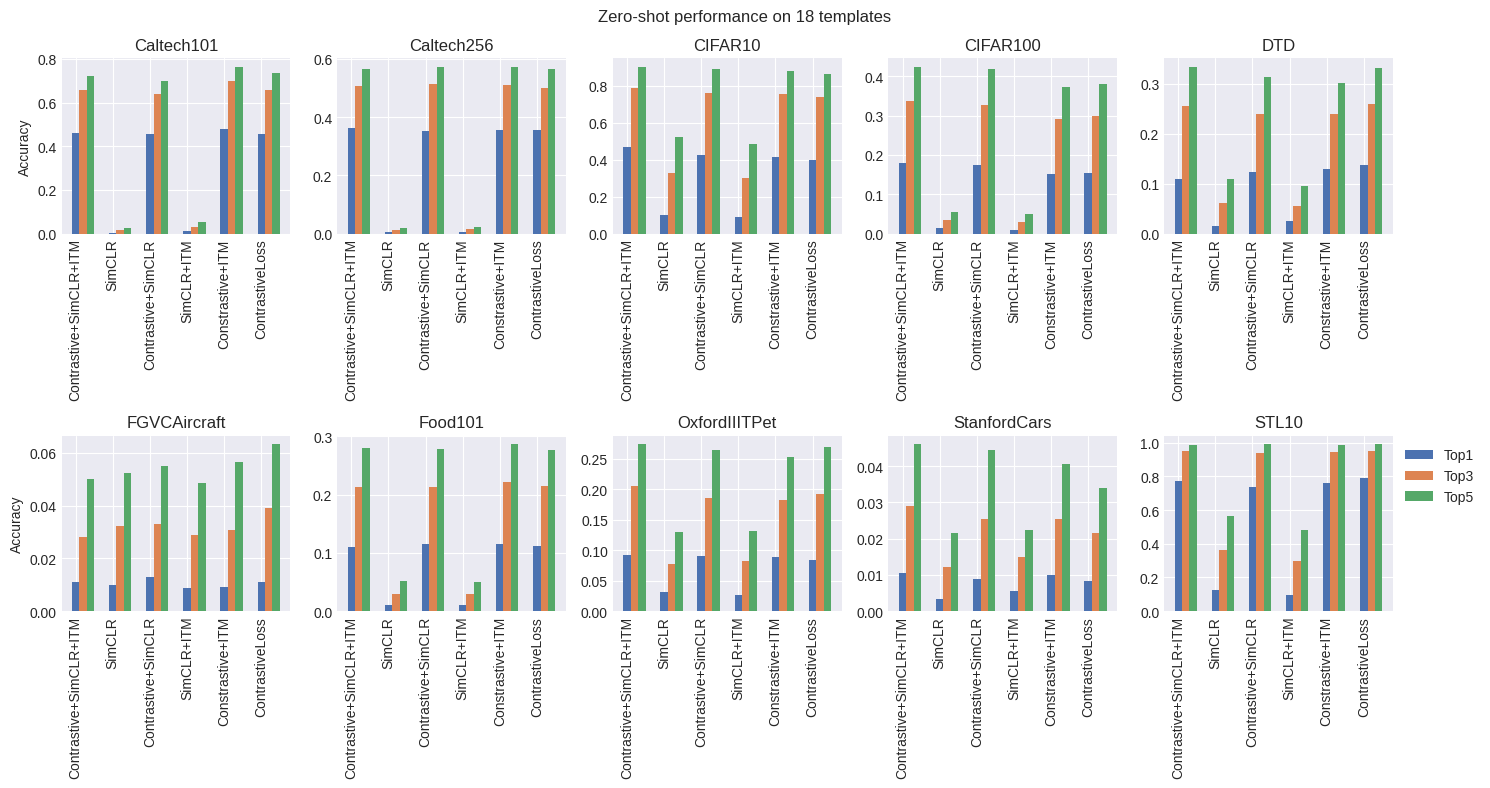

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle(fig_title)
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

width = 0.2
#models = [model for model in data_all_models.keys()]
models_row = [ckpt_config[ckpt]["name"] for ckpt in ckpt_config]

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, size in enumerate(data_all_models['zathvtrx'].keys()):
    if size == "__config__": continue
    xsplot = np.arange(len(models_row))
    ys1 = [data_all_models[ckpt][size]['Top1Accuracy'] for ckpt in ckpt_config]
    ys3 = [data_all_models[ckpt][size]['Top3Accuracy'] for ckpt in ckpt_config]
    ys5 = [data_all_models[ckpt][size]['Top5Accuracy'] for ckpt in ckpt_config]
    axs.flat[sind].set_title(size.split('_')[1])
    axs.flat[sind].bar(xsplot,ys1,width=width,color=colors[0],label='Top1')
    axs.flat[sind].bar(xsplot+width,ys3,width=width,color=colors[1],label='Top3')
    axs.flat[sind].bar(xsplot+width*2,ys5,width=width,color=colors[2],label='Top5')
    
    # axs.flat[dind].axhline(baselines[dataset],linestyle='dashed',color='gray')
    axs.flat[sind].set_xticks(np.arange(len(models_row)), models_row, rotation=90)
plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
        

In [ ]:
data_dir = os.path.join(DATA_DIR, dataset_split)
data_all_models = dict()

for fname in os.listdir(data_dir):
    if "zeroshot" in fname:
        fpath = os.path.join(data_dir, fname)
        model_id = fname.split('-')[0]
        with open(fpath, "rb") as f:
            data = pickle.load(f)
            data_all_models[model_id] = data

print(data_all_models.keys())

dict_keys(['oc0g8fql', 'yh1adr3g', '9nvg456i', 'zathvtrx', '93t3xgrr', '9v1wy0vb'])


In [11]:
dataset_keys = list(data_all_models['zathvtrx']["zeroshot"]["0_templates"].keys())
dataset_keys

['zeroshot_Caltech101',
 'zeroshot_Caltech256',
 'zeroshot_CIFAR10',
 'zeroshot_CIFAR100',
 'zeroshot_DTD',
 'zeroshot_FGVCAircraft',
 'zeroshot_Food101',
 'zeroshot_OxfordIIITPet',
 'zeroshot_StanfordCars',
 'zeroshot_STL10',
 '__config__']

### Zero-shot for varying templates

In [19]:
with open("/home/phisch/multimodal/test_results/zero_shot/full_dataset/18_templates/9nvg456i_zero_shot_data_dict.p", "rb") as f:
    data = pickle.load(f)
print(data.keys())

dict_keys(['zeroshot_Caltech101', 'zeroshot_Caltech256', 'zeroshot_CIFAR10', 'zeroshot_CIFAR100', 'zeroshot_DTD', 'zeroshot_FGVCAircraft', 'zeroshot_Food101', 'zeroshot_OxfordIIITPet', 'zeroshot_StanfordCars', 'zeroshot_STL10', '__config__'])


In [20]:
print(data["zeroshot_CIFAR10"].keys()
    )

dict_keys(['ConfusionMatrix', 'Top1Accuracy', 'Top3Accuracy', 'Top5Accuracy'])


In [21]:
# Collect data for each model for each template amount
zeroshot_dir = os.path.join(DATA_DIR, "zero_shot")
zeroshot_split_dir = os.path.join(zeroshot_dir, "full_dataset")

data_all_models_all_templates = {}

for template_num in os.listdir(zeroshot_split_dir):
    template_dir = os.path.join(zeroshot_split_dir, template_num)
    if os.path.isdir(template_dir):
        for file_name in os.listdir(template_dir):
            with open(os.path.join(template_dir, file_name), "rb") as f:
                data = pickle.load(f)
            model_id = file_name.split("_")[0]
            # Initialize the dictionary for the model_id if it doesn't exist
            if model_id not in data_all_models_all_templates:
                data_all_models_all_templates[model_id] = {}
            data_all_models_all_templates[model_id][template_num] = data

In [22]:
for model_id in data_all_models_all_templates.keys():
    print(model_id)
    print(data_all_models_all_templates[model_id].keys())

9nvg456i
dict_keys(['18_templates', '5_templates', '1_template', '0_templates'])
zathvtrx
dict_keys(['18_templates', '5_templates', '1_template', '0_templates'])
oc0g8fql
dict_keys(['18_templates', '5_templates', '1_template', '0_templates'])
9v1wy0vb
dict_keys(['18_templates', '5_templates', '1_template', '0_templates'])
93t3xgrr
dict_keys(['18_templates', '5_templates', '1_template', '0_templates'])
yh1adr3g
dict_keys(['18_templates', '5_templates', '1_template', '0_templates'])


In [24]:
print(data_all_models_all_templates["93t3xgrr"]["0_templates"])

{'zeroshot_Caltech101': {'ConfusionMatrix': array([[167,   0,   0, ...,   0,   0,   0],
       [256,   0,   0, ...,   0,   0,   0],
       [  0,   0, 139, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   2,   0],
       [  0,   0,   0, ...,   0,   0,   0]]), 'Top1Accuracy': 0.39345914125442505, 'Top3Accuracy': 0.6061086058616638, 'Top5Accuracy': 0.6843394041061401}, 'zeroshot_Caltech256': {'ConfusionMatrix': array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 67,  0, ...,  0,  0,  0],
       [ 0,  0, 34, ...,  0,  3,  0],
       ...,
       [ 1,  0,  0, ...,  6,  0,  0],
       [ 0,  0,  0, ...,  0, 30,  0],
       [ 9,  8,  0, ...,  0,  4,  0]]), 'Top1Accuracy': 0.2905452251434326, 'Top3Accuracy': 0.4468858540058136, 'Top5Accuracy': 0.5162344574928284}, 'zeroshot_CIFAR10': {'ConfusionMatrix': array([[3504,  335,  236,  420,    0,  141,  172,    0,  135,   57],
       [ 410, 3545,   13,   87,    0,   88,   98,    0,    9,  75

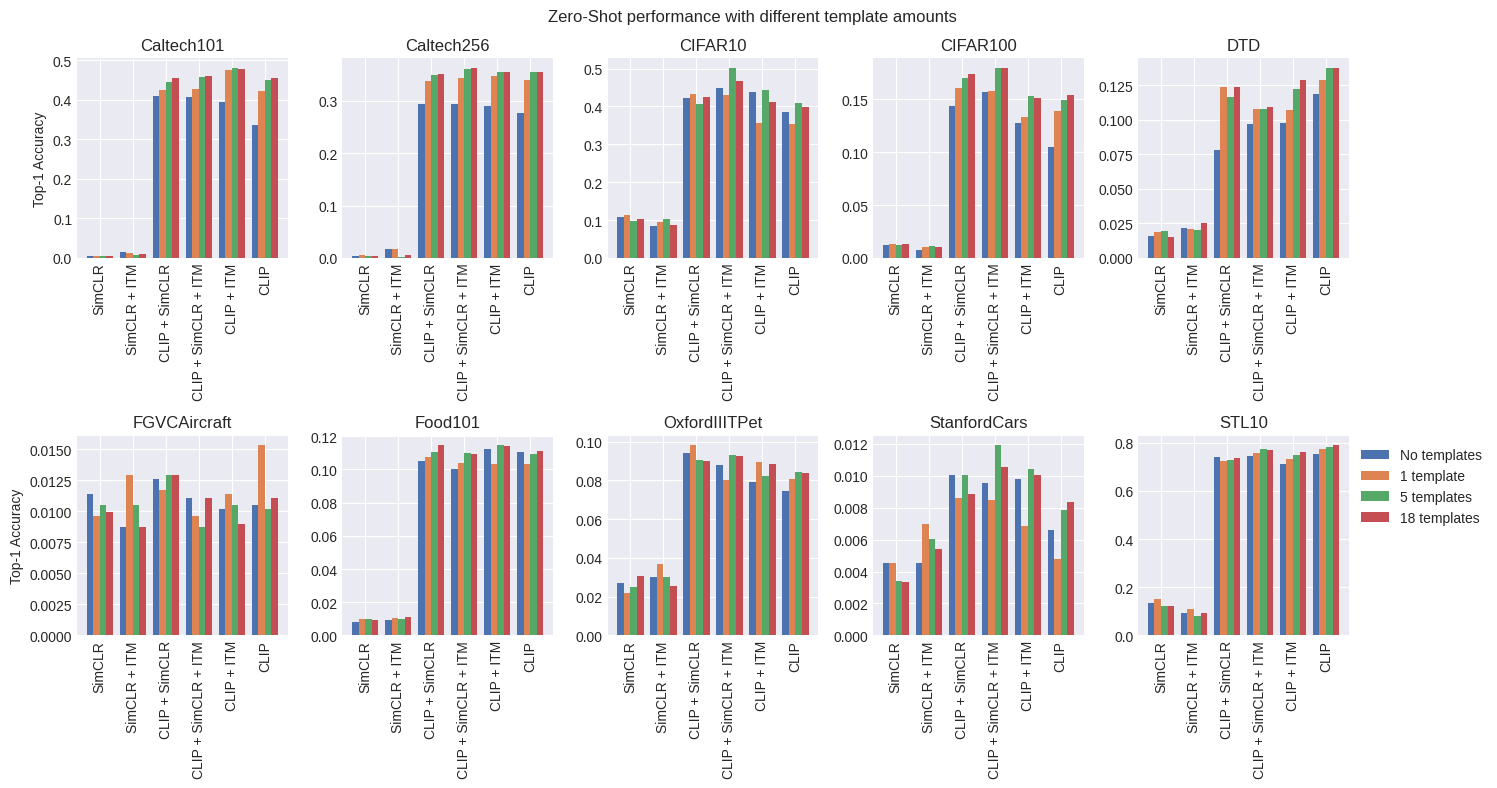

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 4)
fig_title = "Zero-Shot performance with different template amounts"
ylabel = "Top-1 Accuracy"

data_all_models = data_all_models_all_templates

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle(fig_title)
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

#models = [model for model in data_all_models.keys()]
models_row = [ckpt_config[ckpt]["name"] for ckpt in ckpt_config]

dataset_keys = list(data_all_models['zathvtrx']["0_templates"].keys())

width = 0.2

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, size in enumerate(dataset_keys):
    if size == "__config__": continue
    xsplot = np.arange(len(models_row))
    ys0 = [data_all_models[ckpt]["0_templates"][size]["Top1Accuracy"] for ckpt in ckpt_config]
    ys1 = [data_all_models[ckpt]["1_template"][size]["Top1Accuracy"] for ckpt in ckpt_config]
    ys5 = [data_all_models[ckpt]["5_templates"][size]["Top1Accuracy"] for ckpt in ckpt_config]
    ys18 = [data_all_models[ckpt]["18_templates"][size]["Top1Accuracy"] for ckpt in ckpt_config]

    axs.flat[sind].set_title(size.split('_')[1])
    axs.flat[sind].bar(xsplot,ys0,width=width,color=colors[0],label='No templates')
    axs.flat[sind].bar(xsplot+width,ys1,width=width,color=colors[1],label='1 template')
    axs.flat[sind].bar(xsplot+width*2,ys5,width=width,color=colors[2],label='5 templates')
    axs.flat[sind].bar(xsplot+width*3,ys18,width=width,color=colors[3],label='18 templates')
    
    # axs.flat[dind].axhline(baselines[dataset],linestyle='dashed',color='gray')
    axs.flat[sind].set_xticks(xsplot + width * 1.5)
    axs.flat[sind].set_xticklabels(models_row, rotation=90)
plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
        

In [ ]:
# with open('/pfss/mlde/workspaces/mlde_wsp_PI_Roig/bhavin/students/phillipscholl/multimodal/zero_shot_results.p','rb') as f:
# data = pickle.load(f)
with open(
    "/pfss/mlde/workspaces/mlde_wsp_PI_Roig/bhavin/students/phillipscholl/multimodal/analysis/data/linear_results.p",
    "rb",
) as f:
    data = pickle.load(f)


plt.style.use("seaborn-v0_8-darkgrid")

colors = sns.color_palette("deep", 3)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

width = 0.2
models_row = list(data.keys())
sortidx = [0, 2, 4, 5, 3, 1]
models_row = [models_row[s] for s in sortidx]
print(models_row)
indices = np.arange(len(models_row))

axs[0].set_ylabel("Accuracy")
for sind, size in enumerate(["linear_cifar-10", "linear_caltech-101"]):

    axs[sind].set_title(size)

    ys = [data[x][size]["Top1Accuracy"] for x in models_row]
    axs[sind].bar(indices, ys, width=width, color=colors[0], label="Top1")
    # axs[dind].set_xticks([i for i in range(len(xs))],xs,rotation=90)

    ys = [data[x][size]["Top3Accuracy"] for x in models_row]
    axs[sind].bar(indices + width, ys, width=width, color=colors[1], label="Top3")
    axs[sind].set_xticks(indices + width, models_row, rotation=90)

    ys = [data[x][size]["Top5Accuracy"] for x in models_row]
    axs[sind].bar(indices + width * 2, ys, width=width, color=colors[2], label="Top5")
    axs[sind].set_xticks([i for i in range(len(models_row))], models_row, rotation=90)

plt.legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
# plt.savefig(
#     SAVE_FIGURES_FIG / "LinearProbe_all_models_last_layer.png", bbox_inches="tight"
# )

### Plot zero-shot across dataset sizes

In [44]:
dataset_sizes_order = ["0.2_dataset", "0.4_dataset", "0.6_dataset", "0.8_dataset", "full_dataset", "full_dataset_im384"]
model_order = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]

CKPT_CONFIG_DIR = os.path.join(ROOT, "checkpoints")
DICT_CKPTS_CONFIG = {size: OmegaConf.load(os.path.join(CKPT_CONFIG_DIR, f"{size}_models.yaml")) for size in dataset_sizes_order}

In [45]:
# Collect data for each model for each dataset size
data_all_dataset_sizes = {}

for ds_size in dataset_sizes_order:
    ds_size_dir = os.path.join(DATA_DIR, ds_size)
    data_all_models = {}
    for file in os.listdir(ds_size_dir):
        if "-data_dict" in file:
            with open(os.path.join(ds_size_dir, file), "rb") as f:
                data = pickle.load(f)
            model_id = file.split("-")[0]
            data_all_models[model_id] = data
    if data_all_models == {}: continue
    data_all_dataset_sizes[ds_size] = {model_id: data_all_models[model_id] for model_id in DICT_CKPTS_CONFIG[ds_size] if model_id in data_all_models}

In [ ]:
print(data_all_dataset_sizes["0.4_dataset"]["32yprt3g"]["zeroshot_CIFAR10"])

0.4_dataset
6
0.6_dataset
6
full_dataset_im384
6


In [59]:
from src.analysis.utils import DICT_CKPTS_CONFIG, DATASET_SIZES, load_zeroshot_results

data_zeroshot = load_zeroshot_results()
model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")

In [12]:
for k, v in data_zeroshot.items():
    for k1, v1, in v.items():
        for k2, v2 in v1.items():
            if "1_template" in v2.keys():
                print(k, k1, k2, v2.keys())

full_dataset yh1adr3g zeroshot_Caltech101 dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_Caltech256 dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_CIFAR10 dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_CIFAR100 dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_DTD dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_FGVCAircraft dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_Food101 dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_OxfordIIITPet dict_keys(['0_templates', '1_template', '5_templates', '18_templates'])
full_dataset yh1adr3g zeroshot_StanfordCars dict_keys(['0_templates', '1_template', '5_templates',

### Zero-shot across training dataset sizes for each test dataset

In [ ]:
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
template_size = "1_templates"
accuracy = "Top1Accuracy"
baselines = {
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
}

data = data_zeroshot
dataset_keys = list(data["full_dataset"]["zathvtrx"].keys())
dataset_keys.remove("__config__")
y_values = {dataset: {model: [] for model in model_names} for dataset in dataset_keys}

for dataset_name in dataset_keys:
    for size in data.keys():
        # template_size = "1_template" if dataset_size == "full_dataset" else "1_templates"
        data_size_data = data[size]
        for model_id, model_data in data_size_data.items():
            y_values[dataset_name][model_id_mapping[model_id]["name"]].append(model_data[dataset_name][template_size][accuracy])

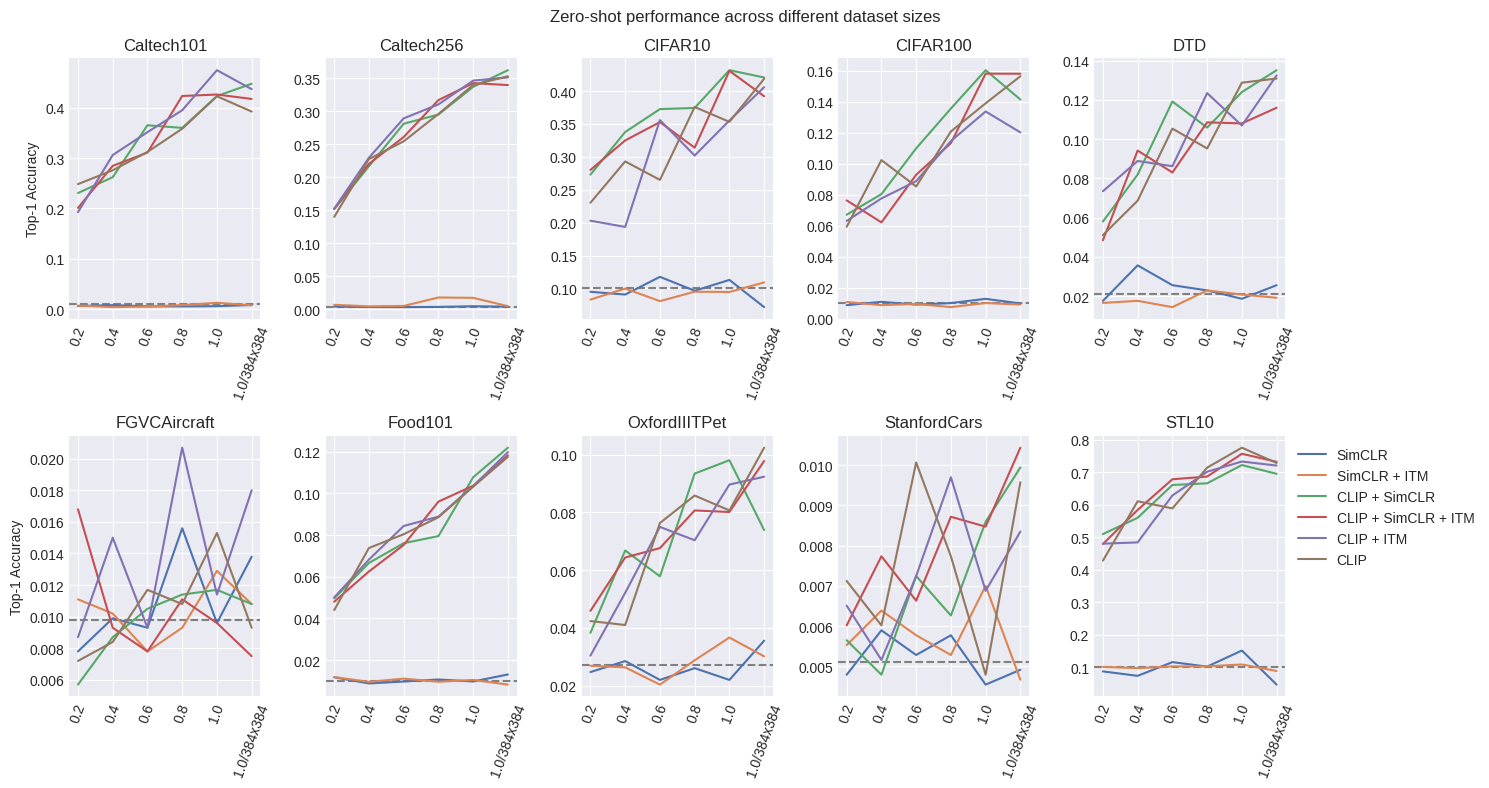

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle("Zero-shot performance across different dataset sizes")
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)

width = 0.2
models_row = list(y_values.keys())
datasets = [dataset.replace("zeroshot_", "") for dataset in list(data_zeroshot["full_dataset"]["zathvtrx"].keys())]
DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1.0/384x384"]

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, size in enumerate(y_values.keys()):
    if size == "__config__": continue
    axs.flat[sind].set_title(size.split('_')[1])
    axs.flat[sind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES, rotation=70)
    axs.flat[sind].axhline(baselines[size.split('_')[1]],linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(y_values[size].items()):
        axs.flat[sind].plot(y, c=colors[idx], label=model)

plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
        

### Linear probe across training dataset sizes for each test dataset

In [14]:

from omegaconf import OmegaConf
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.analysis.utils import DICT_CKPTS_CONFIG, DATASET_SIZES, load_linear_probe_results

data_linear_probe = load_linear_probe_results(sub_dir="ImageNet")
model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")

In [4]:
data_linear_probe

{'0.2_dataset': {'u5l6rwc4': {'linear_ImageNet-100-0.1': {'ConfusionMatrix': array([[20,  1,  0, ...,  2,  0,  0],
           [ 0, 34,  0, ...,  0,  0,  0],
           [ 0,  0, 10, ...,  0,  0,  1],
           ...,
           [ 2,  0,  0, ..., 17,  0,  0],
           [ 0,  0,  0, ...,  0, 16,  1],
           [ 0,  0,  0, ...,  0,  0, 17]]),
    'Top1Accuracy': 0.44440001249313354,
    'Top3Accuracy': 0.6665999889373779,
    'Top5Accuracy': 0.7577999830245972},
   'linear_ImageNet-100-0.01': {'ConfusionMatrix': array([[11,  0,  0, ...,  5,  0,  0],
           [ 1, 18,  0, ...,  1,  0,  0],
           [ 0,  0, 13, ...,  0,  0,  0],
           ...,
           [ 4,  0,  0, ...,  7,  0,  0],
           [ 0,  0,  0, ...,  0,  7,  1],
           [ 0,  0,  1, ...,  0,  0,  6]]),
    'Top1Accuracy': 0.3100000023841858,
    'Top3Accuracy': 0.5134000182151794,
    'Top5Accuracy': 0.6123999953269958},
   '__config__': {'model': {'model': {'image_encoder_name': 'google/vit-base-patch16-224', 'text_

In [ ]:
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"
baselines = {
    "ImageNet-100-0.1": 1/100.,
    "ImageNet-100-0.01": 1/100.,
}

data = data_linear_probe
dataset_keys = list(data["0.2_dataset"]["u5l6rwc4"].keys())
dataset_keys.remove("__config__")
y_values = {dataset: {model: [] for model in model_names} for dataset in dataset_keys}

for dataset_name in dataset_keys:
    for size in data.keys():
        # template_size = "1_template" if dataset_size == "full_dataset" else "1_templates"
        data_size_data = data[size]
        for model_id, model_data in data_size_data.items():
            y_values[dataset_name][model_id_mapping[model_id]["name"]].append(model_data[dataset_name][accuracy])

In [7]:
y_values

{'linear_ImageNet-100-0.1': {'SimCLR': [0.3003999888896942,
   0.3086000084877014,
   0.3001999855041504,
   0.29440000653266907,
   0.29739999771118164,
   0.3131999969482422],
  'SimCLR + ITM': [0.2996000051498413,
   0.30239999294281006,
   0.2994000017642975,
   0.2980000078678131,
   0.29260000586509705,
   0.31040000915527344],
  'CLIP + SimCLR': [0.44440001249313354,
   0.5098000168800354,
   0.551800012588501,
   0.5781999826431274,
   0.5956000089645386],
  'CLIP + SimCLR + ITM': [0.448199987411499,
   0.5189999938011169,
   0.557200014591217,
   0.5753999948501587,
   0.603600025177002],
  'CLIP + ITM': [0.37380000948905945,
   0.5117999911308289,
   0.5676000118255615,
   0.5659999847412109,
   0.5863999724388123,
   0.6227999925613403],
  'CLIP': [0.35100001096725464,
   0.5105999708175659,
   0.5450000166893005,
   0.5845999717712402,
   0.5971999764442444,
   0.6291999816894531]},
 'linear_ImageNet-100-0.01': {'SimCLR': [0.17159999907016754,
   0.16500000655651093,
   0.1

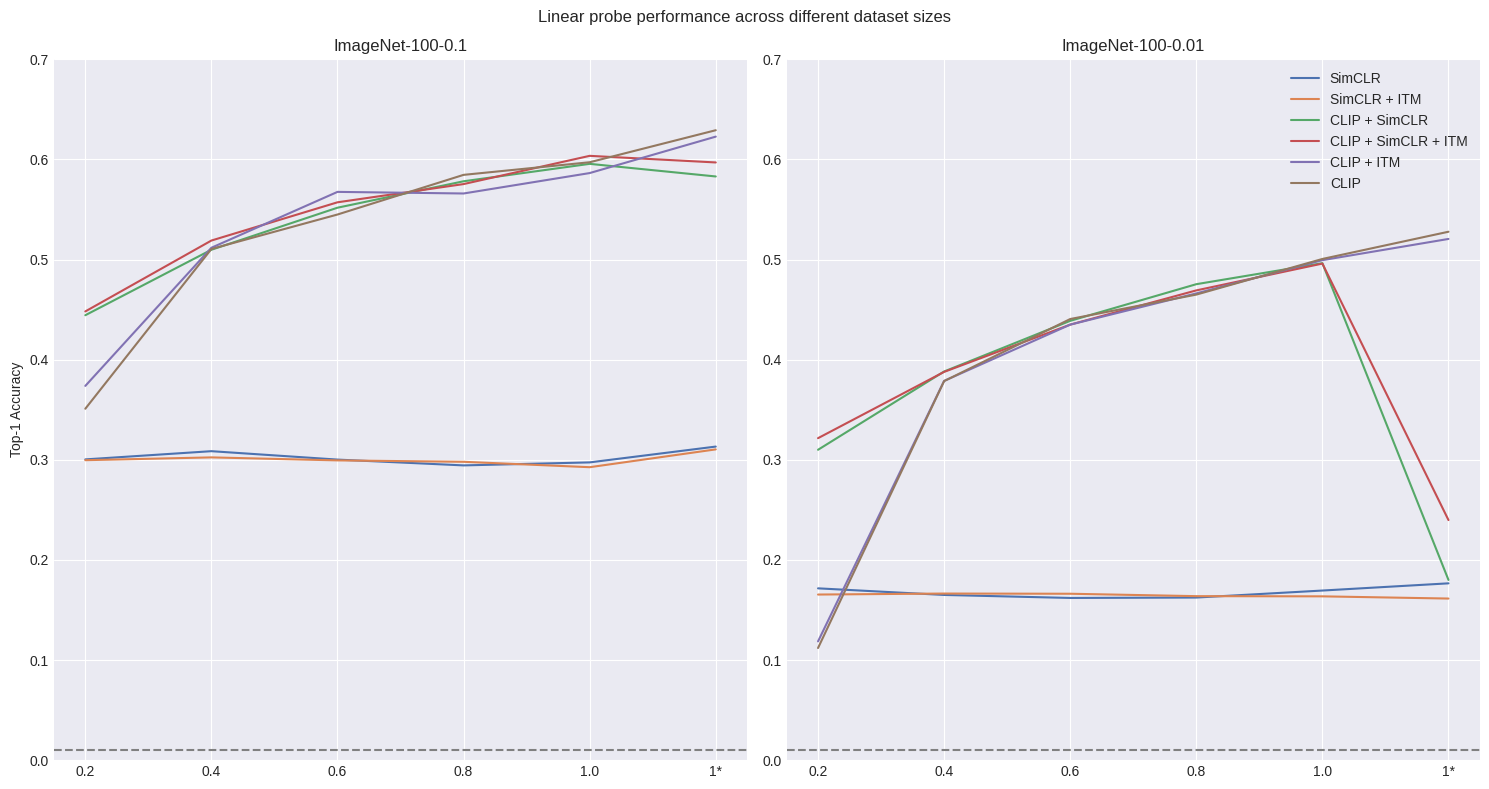

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Linear probe performance across different dataset sizes")
ylabel = "Top-1 Accuracy"
axs[0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)

width = 0.2
models_row = list(y_values.keys())
datasets = [dataset.replace("linear_probe_", "") for dataset in list(data["0.2_dataset"]["u5l6rwc4"].keys())]
DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1*"]

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, size in enumerate(y_values.keys()):
    if size == "__config__": continue
    axs.flat[sind].set_title(size.split('_')[1])
    axs.flat[sind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES)
    axs.flat[sind].set_ylim(0, 0.7)
    axs.flat[sind].axhline(baselines[size.split('_')[1]],linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(y_values[size].items()):
        axs.flat[sind].plot(y, c=colors[idx], label=model)

plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
        

In [ ]:
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"
baselines = {
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}

data = data_linear_probe
dataset_keys = list(data["0.2_dataset"]["u5l6rwc4"].keys())
dataset_keys.remove("__config__")
dataset_keys.remove("linear_Places365")
y_values = {dataset: {model: [] for model in model_names} for dataset in dataset_keys}

for dataset_name in dataset_keys:
    for size in data.keys():
        # template_size = "1_template" if dataset_size == "full_dataset" else "1_templates"
        data_size_data = data[size]
        for model_id, model_data in data_size_data.items():
            y_values[dataset_name][model_id_mapping[model_id]["name"]].append(model_data[dataset_name][accuracy])

In [9]:
y_values

{'linear_Caltech101': {'SimCLR': [0.72926265001297,
   0.7373272180557251,
   0.7390552759170532,
   0.7235022783279419,
   0.7355991005897522,
   0.650921642780304],
  'SimCLR + ITM': [0.718317985534668,
   0.7442396283149719,
   0.7482718825340271,
   0.7471198439598083,
   0.7206221222877502,
   0.6895161271095276],
  'CLIP + SimCLR': [0.7442396283149719,
   0.8029953837394714,
   0.8237327337265015,
   0.835829496383667,
   0.8657833933830261,
   0.8260368704795837],
  'CLIP + SimCLR + ITM': [0.7453917264938354,
   0.7845622301101685,
   0.8254608511924744,
   0.8312212228775024,
   0.8680875301361084,
   0.8410138487815857],
  'CLIP + ITM': [0.7419354915618896,
   0.7603686451911926,
   0.8047235012054443,
   0.8220046162605286,
   0.850806474685669,
   0.8197004795074463],
  'CLIP': [0.6941244006156921,
   0.764976978302002,
   0.8087557554244995,
   0.8369815945625305,
   0.843317985534668,
   0.8271889686584473]},
 'linear_Caltech256': {'SimCLR': [0.4170205891132355,
   0.42192

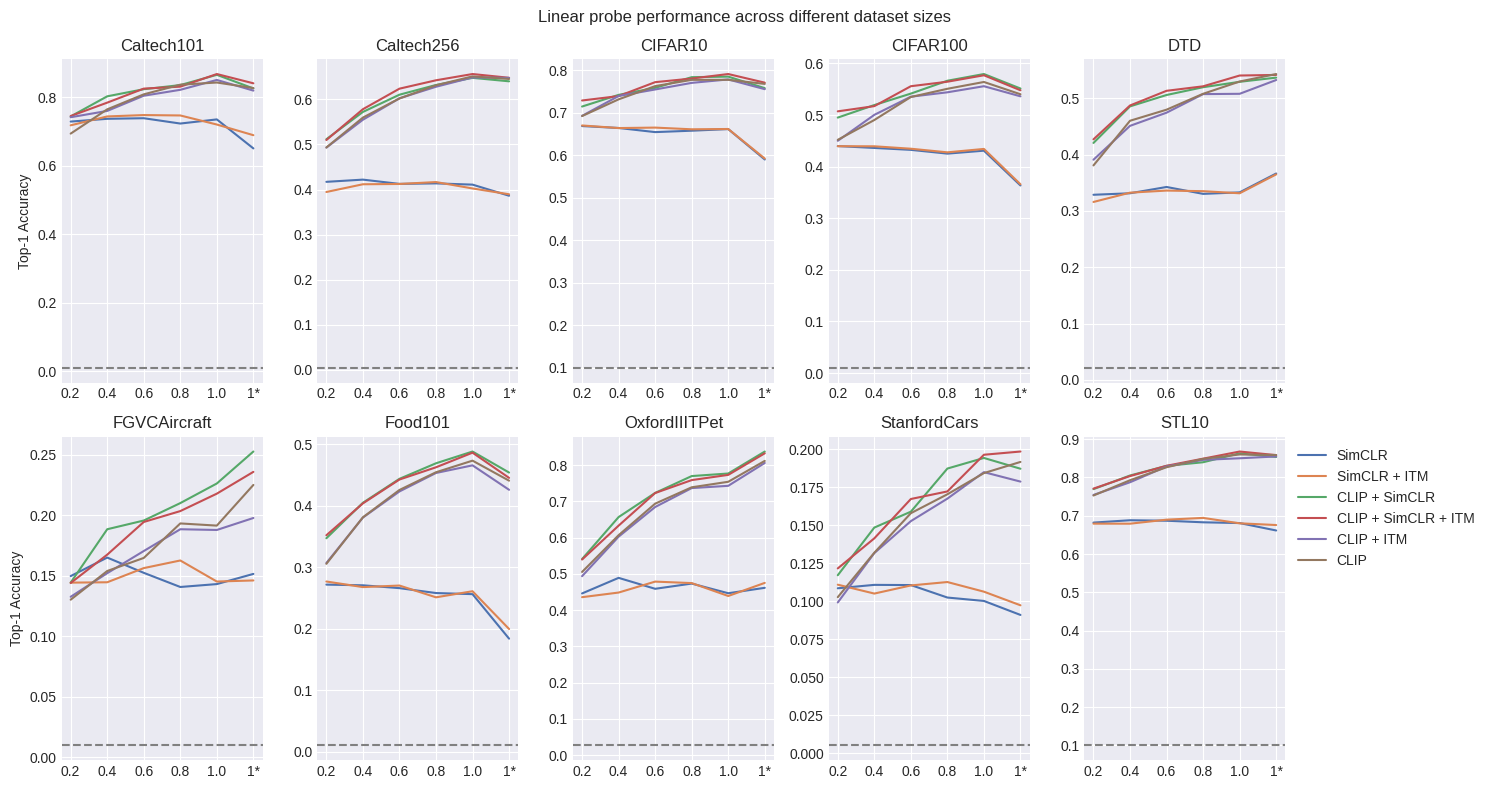

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle("Linear probe performance across different dataset sizes")
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)

width = 0.2
models_row = list(y_values.keys())
datasets = [dataset.replace("linear_probe_", "") for dataset in list(data["0.2_dataset"]["u5l6rwc4"].keys())]
DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1*"]

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, size in enumerate(y_values.keys()):
    if size == "__config__": continue
    axs.flat[sind].set_title(size.split('_')[1])
    axs.flat[sind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES)
    axs.flat[sind].axhline(baselines[size.split('_')[1]],linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(y_values[size].items()):
        axs.flat[sind].plot(y, c=colors[idx], label=model)

plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
        

In [1]:
from omegaconf import OmegaConf
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.analysis.utils import DICT_CKPTS_CONFIG, DATASET_SIZES, load_linear_probe_results

data_linear_probe = load_linear_probe_results()
model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")

In [2]:
data_linear_probe["full_dataset_im384"]["03avtdyk"]

{'linear_Caltech101': {'ConfusionMatrix': array([[93,  0,  0, ...,  0,  0,  0],
         [ 3, 81,  0, ...,  0,  0,  0],
         [ 0,  0, 33, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  6,  0,  0],
         [ 0,  0,  0, ...,  0,  1,  0],
         [ 0,  0,  0, ...,  0,  0,  8]]),
  'Top1Accuracy': 0.6895161271095276,
  'Top3Accuracy': 0.8162442445755005,
  'Top5Accuracy': 0.8577188849449158},
 'linear_Caltech256': {'ConfusionMatrix': array([[11,  0,  0, ...,  0,  0,  0],
         [ 0, 11,  0, ...,  0,  0,  0],
         [ 0,  0, 11, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  8,  0,  0],
         [ 0,  0,  0, ...,  0,  8,  0],
         [ 0,  0,  0, ...,  0,  1, 97]]),
  'Top1Accuracy': 0.3894152343273163,
  'Top3Accuracy': 0.5478602051734924,
  'Top5Accuracy': 0.620385468006134},
 'linear_CIFAR10': {'ConfusionMatrix': array([[565, 111,  67,  29,   6,   6,  28,  18, 134,  36],
         [ 75, 687,  10,  23,   2,   9,  13,  24,  56, 101],
         [ 64,  42, 

In [ ]:
data_linear_probe["full_dataset_im384"]["03avtdyk"]
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"
baselines = {
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}

data = data_linear_probe
dataset_keys = list(data["0.2_dataset"]["u5l6rwc4"].keys())
dataset_keys.remove("__config__")
dataset_keys.remove("linear_Places365")
y_values = {dataset: {model: [] for model in model_names} for dataset in dataset_keys}

for dataset_name in dataset_keys:
    for size in data.keys():
        # template_size = "1_template" if dataset_size == "full_dataset" else "1_templates"
        data_size_data = data[size]
        for model_id, model_data in data_size_data.items():
            y_values[dataset_name][model_id_mapping[model_id]["name"]].append(model_data[dataset_name][accuracy])
y_values
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle("Linear probe performance across different dataset sizes")
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)

width = 0.2
models_row = list(y_values.keys())
datasets = [dataset.replace("linear_probe_", "") for dataset in list(data["0.2_dataset"]["u5l6rwc4"].keys())]
DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1*"]

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, size in enumerate(y_values.keys()):
    if size == "__config__": continue
    axs.flat[sind].set_title(size.split('_')[1])
    axs.flat[sind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES)
    axs.flat[sind].axhline(baselines[size.split('_')[1]],linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(y_values[size].items()):
        axs.flat[sind].plot(y, c=colors[idx], label=model)

plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
        

### Linear probe: plot dataset

In [ ]:
dataset = "ImageNet-100-0.1"
metric = "Top1Accuracy"

plot_data = {}

file_path = "/home/phisch/multimodal/models.csv"
with open(file_path, newline='') as models_csv:
    models_reader = csv.DictReader(models_csv)
    for models_row in models_reader:
        model_name = models_row["model_name"]
        print(model_name)
        values = []
        dataset_sizes = list(models_row.keys())
        dataset_sizes.remove("model_name")
        for size in dataset_sizes:
            model_id = models_row[size]
            score = model_scores.loc[(model_scores["model_id"] == model_id) & 
                               (model_scores["dataset"] == dataset) & 
                               (model_scores["metric"] == metric), "score"].item()
            values.append(score)
        plot_data[model_name] = values

plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots()#, figsize=(15, 8))

fig.suptitle(f"Linear probe: {dataset}")
ylabel = "Top-1 Accuracy"
axs.set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)
DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1*"]

for idx, (model_name, scores) in enumerate(plot_data.items()):
    axs.plot(scores, label=model_name, c=colors[idx])
axs.set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES)
axs.axhline(1./365,linestyle='dashed',color='gray')
# axs.set_ylim(0.035, 0.15)

plt.legend(bbox_to_anchor=(1,1), frameon=True)
# axs.flat[1].legend(frameon=True)
# fig.tight_layout()

SimCLR


ValueError: can only convert an array of size 1 to a Python scalar

### Zero-shot: ImageNet

In [46]:
import csv
from omegaconf import OmegaConf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = "Places365"
metric = "Top1Accuracy"

model_scores = pd.read_csv("/home/phisch/multimodal/model_scores.csv")

plot_data = {}

file_path = "/home/phisch/multimodal/models.csv"
with open(file_path, newline='') as models_csv:
    models_reader = csv.DictReader(models_csv)
    for models_row in models_reader:
        model_name = models_row["model_name"]
        print(model_name)
        values = []
        dataset_sizes = list(models_row.keys())
        dataset_sizes.remove("model_name")
        for size in dataset_sizes:
            model_id = models_row[size]
            score = model_scores.loc[(model_scores["model_id"] == model_id) & 
                               (model_scores["dataset"] == dataset) & 
                               (model_scores["metric"] == metric), "score"].item()
            values.append(score)
        plot_data[model_name] = values

SimCLR
SimCLR + ITM
CLIP + SimCLR
CLIP + SimCLR + ITM
CLIP + ITM
CLIP


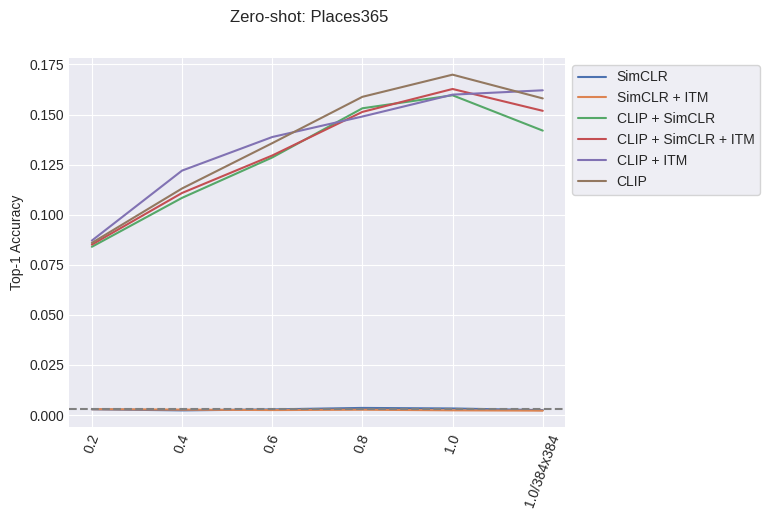

In [74]:
plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots()#, figsize=(15, 8))

fig.suptitle(f"Zero-shot: {dataset}")
ylabel = "Top-1 Accuracy"
axs.set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)
DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1.0/384x384"]

for idx, (model_name, scores) in enumerate(plot_data.items()):
    axs.plot(scores, label=model_name, c=colors[idx])
axs.set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES, rotation=70)
axs.axhline(1./365,linestyle='dashed',color='gray')
# axs.set_ylim(0.035, 0.15)

plt.legend(bbox_to_anchor=(1,1), frameon=True)
# axs.flat[1].legend(frameon=True)
# fig.tight_layout()

### Zero-Shot: global plot

In [54]:
import csv
from omegaconf import OmegaConf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
metric = "Top1Accuracy"

model_scores = pd.read_csv("/home/phisch/multimodal/model_scores.csv")

global_datasets = ["ImageNet", "CIFAR10", "CIFAR100", "Caltech101", "Caltech256", "STL10", "Places365"]
local_datasets = ["DTD", "OxfordIIITPet", "StanfordCars", "FGVCAircraft", "Food101"]

plot_data_global, plot_data_local = {}, {}

file_path = "/home/phisch/multimodal/models.csv"
with open(file_path, newline='') as models_csv:
    models_reader = csv.DictReader(models_csv)
    for models_row in models_reader:
        model_name = models_row["model_name"]
        print(model_name)
        values_global = []
        values_local = []
        dataset_sizes = list(models_row.keys())
        dataset_sizes.remove("model_name")
        for size in dataset_sizes:
            model_id = models_row[size]
            scores = model_scores.loc[(model_scores["model_id"] == model_id) & 
                               (model_scores["metric"] == metric), "score"]
            score_global = np.mean([model_scores.loc[(model_scores["model_id"] == model_id) & 
                                                (model_scores["dataset"] == ds) & 
                                                (model_scores["metric"] == metric), "score"].item() 
                                for ds in global_datasets])
            values_global.append(score_global)
            score_local = np.mean([model_scores.loc[(model_scores["model_id"] == model_id) & 
                                                (model_scores["dataset"] == ds) & 
                                                (model_scores["metric"] == metric), "score"].item() 
                                for ds in local_datasets])
            values_local.append(score_local)
        plot_data_global[model_name] = values_global
        plot_data_local[model_name] = values_local

SimCLR
SimCLR + ITM
CLIP + SimCLR
CLIP + SimCLR + ITM
CLIP + ITM
CLIP


### 

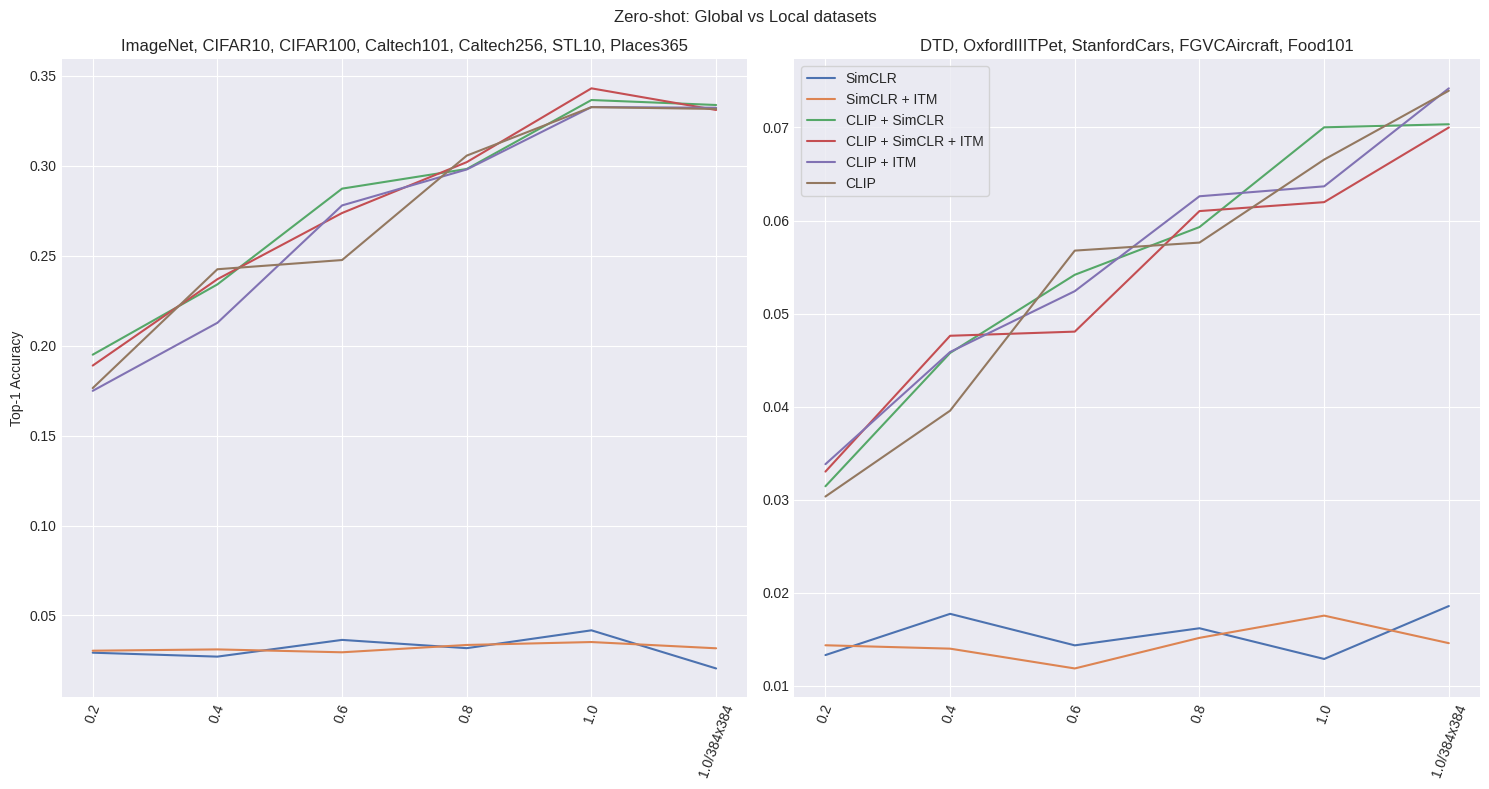

In [77]:
plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle("Zero-shot: Global vs Local datasets")
title_global = "ImageNet, CIFAR10, CIFAR100, Caltech101, Caltech256, STL10, Places365"
title_local = "DTD, OxfordIIITPet, StanfordCars, FGVCAircraft, Food101"

ylabel = "Top-1 Accuracy"
axs[0].set_ylabel(ylabel)

colors = sns.color_palette("deep", 6)

DATASET_SIZES = ["0.2", "0.4", "0.6", "0.8", "1.0", "1.0/384x384"]

for pind, plot_data in enumerate([plot_data_global, plot_data_local]):
    axs.flat[pind].set_title(title_global if pind == 0 else title_local)
    for idx, (model_name, scores) in enumerate(plot_data.items()):
        axs.flat[pind].plot(scores, label=model_name, c=colors[idx])
    axs.flat[pind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES, rotation=70)
    # axs.axhline(0.001,linestyle='dashed',color='gray')
    # axs.set_ylim(0.035, 0.15)

#plt.legend(bbox_to_anchor=(1,1))
axs.flat[1].legend(frameon=True)
fig.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

DATASET_SIZES = ["0.2_dataset", "0.4_dataset", "0.6_dataset", "0.8_dataset", "full_dataset", "full_dataset_im384"]
template_size = "1_templates"
accuracy = "Top1Accuracy"
dataset_name = "zeroshot_CIFAR10"

data = data_zeroshot
y_values = {"SimCLR": [], "SimCLR + ITM": [], "CLIP + SimCLR": [], "CLIP + SimCLR + ITM": [], "CLIP + ITM": [], "CLIP": []}

for size in data.keys():
    data_size_data = data[size]
    for model_id, model_data in data_size_data.items():
        y_values[model_id_mapping[model_id]["name"]].extend(model_data[dataset_name][template_size][accuracy])


plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 6)
fig, ax = plt.subplots()
# fig.subplots_adjust(wspace=0.1)

ds_size_names = ["0.4", "0.6", "1/ViT-384"]

ax.set_title("Top1 Accuracy")
ax.set_xlabel("Dataset sizes")
ax.set_ylabel("Accuracy on CIFAR10")

ax.set_xticks(range(len(ds_size_names)), ds_size_names, rotation=90)
# axs[0].set_ylim(0.32, 1.0)

model_ids = []
for ds_size in data_all_dataset_sizes.keys():
    model_ids.extend(list(data_all_dataset_sizes[ds_size].keys()))
    
for kind, model_id in enumerate(model_ids):
    ys = [data[ds_size][model_id]["zeroshot_CIFAR10"]["Top1Accuracy"] for ds_size in data.keys()]
    img = ax.plot(ys, label=model_order, c=colors[kind])
    # axs[0].legend()

KeyError: '32yprt3g'

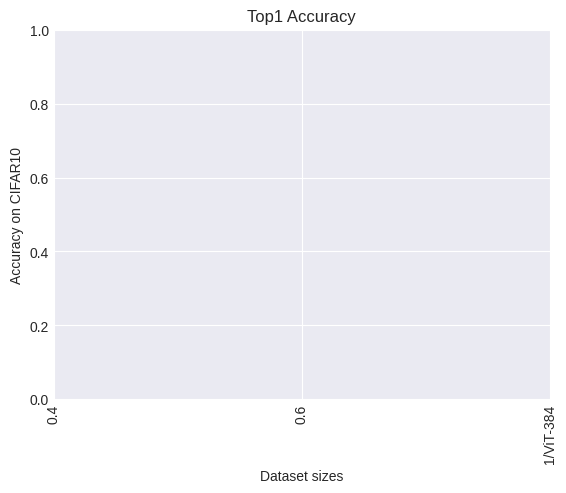

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

data = data_zeroshot

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 6)
fig, ax = plt.subplots()
# fig.subplots_adjust(wspace=0.1)

ds_size_names = ["0.4", "0.6", "1/ViT-384"]

ax.set_title("Top1 Accuracy")
ax.set_xlabel("Dataset sizes")
ax.set_ylabel("Accuracy on CIFAR10")

ax.set_xticks(range(len(ds_size_names)), ds_size_names, rotation=90)
# axs[0].set_ylim(0.32, 1.0)

model_ids = []
for ds_size in data_all_dataset_sizes.keys():
    model_ids.extend(list(data_all_dataset_sizes[ds_size].keys()))
    
for kind, model_id in enumerate(model_ids):
    ys = [data[ds_size][model_id]["zeroshot_CIFAR10"]["Top1Accuracy"] for ds_size in data.keys()]
    img = ax.plot(ys, label=model_order, c=colors[kind])
    # axs[0].legend()

#### Linear probe across layers

In [17]:
from omegaconf import OmegaConf
from utils import load_linear_probe_across_layers_results

data_dir = "/home/phisch/multimodal/test_results"
data = load_linear_probe_across_layers_results(data_dir, "Caltech101")
model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")

/home/phisch/multimodal/test_results/0.2_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.8_dataset/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset_im384/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset_aug/linear_per_layer
/home/phisch/multimodal/test_results/0.05_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.4_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.1_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.6_dataset/linear_per_layer


In [9]:
data

{'0.05_dataset': {'668yutoa': {'encoder_layer_0': {'classifier_0_00010': {'Top1Accuracy': 0.43490782380104065,
     'Top3Accuracy': 0.5789170265197754,
     'Top5Accuracy': 0.6486175060272217}},
   'encoder_layer_1': {'classifier_0_00010': {'Top1Accuracy': 0.531682014465332,
     'Top3Accuracy': 0.6768433451652527,
     'Top5Accuracy': 0.7419354915618896}},
   'encoder_layer_2': {'classifier_0_00010': {'Top1Accuracy': 0.5944700241088867,
     'Top3Accuracy': 0.7384792566299438,
     'Top5Accuracy': 0.7851382493972778}},
   'encoder_layer_3': {'classifier_0_00010': {'Top1Accuracy': 0.625,
     'Top3Accuracy': 0.7528801560401917,
     'Top5Accuracy': 0.8087557554244995}},
   'encoder_layer_4': {'classifier_0_00010': {'Top1Accuracy': 0.6468893885612488,
     'Top3Accuracy': 0.7782257795333862,
     'Top5Accuracy': 0.8243087530136108}},
   'encoder_layer_5': {'classifier_0_00010': {'Top1Accuracy': 0.6561059951782227,
     'Top3Accuracy': 0.7851382493972778,
     'Top5Accuracy': 0.838133633

In [20]:
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"
sizes = ['0.05_dataset', '0.1_dataset', '0.2_dataset', '0.4_dataset', '0.6_dataset', '0.8_dataset', 'full_dataset', "full_dataset_aug", "full_dataset_im384"]

y_values = {size: {model: [] for model in model_names} for size in sizes}

for size in sizes:
    data_size_data = data[size]
    for model_id, model_data in data_size_data.items():
        for layer_name, layer_data in model_data.items():
            if size == "0.05_dataset" or size == "0.1_dataset" or size == "full_dataset_aug":
                y_values[size][model_id_mapping[model_id]["name"]].append(layer_data['classifier_0_00010'][accuracy])
            else:
                y_values[size][model_id_mapping[model_id]["name"]].append(layer_data[accuracy])

In [8]:
y_values

{'0.05_dataset': {'SimCLR': [0.44527649879455566,
   0.5357142686843872,
   0.6013824939727783,
   0.6336405277252197,
   0.6595622301101685,
   0.6687787771224976,
   0.6756912469863892,
   0.6837557554244995,
   0.690092146396637,
   0.7010368704795837,
   0.718317985534668,
   0.72926265001297,
   0.7154377698898315],
  'SimCLR + ITM': [0.43490782380104065,
   0.531682014465332,
   0.5944700241088867,
   0.625,
   0.6468893885612488,
   0.6561059951782227,
   0.6670507192611694,
   0.671658992767334,
   0.6912442445755005,
   0.7062212228775024,
   0.7206221222877502,
   0.7252303957939148,
   0.7056451439857483],
  'CLIP + SimCLR': [0.43145161867141724,
   0.5282257795333862,
   0.5737327337265015,
   0.6036866307258606,
   0.6468893885612488,
   0.6670507192611694,
   0.6860598921775818,
   0.6987327337265015,
   0.7027649879455566,
   0.7021889686584473,
   0.7137096524238586,
   0.72926265001297,
   0.7171658873558044],
  'CLIP + SimCLR + ITM': [0.46025344729423523,
   0.5362903

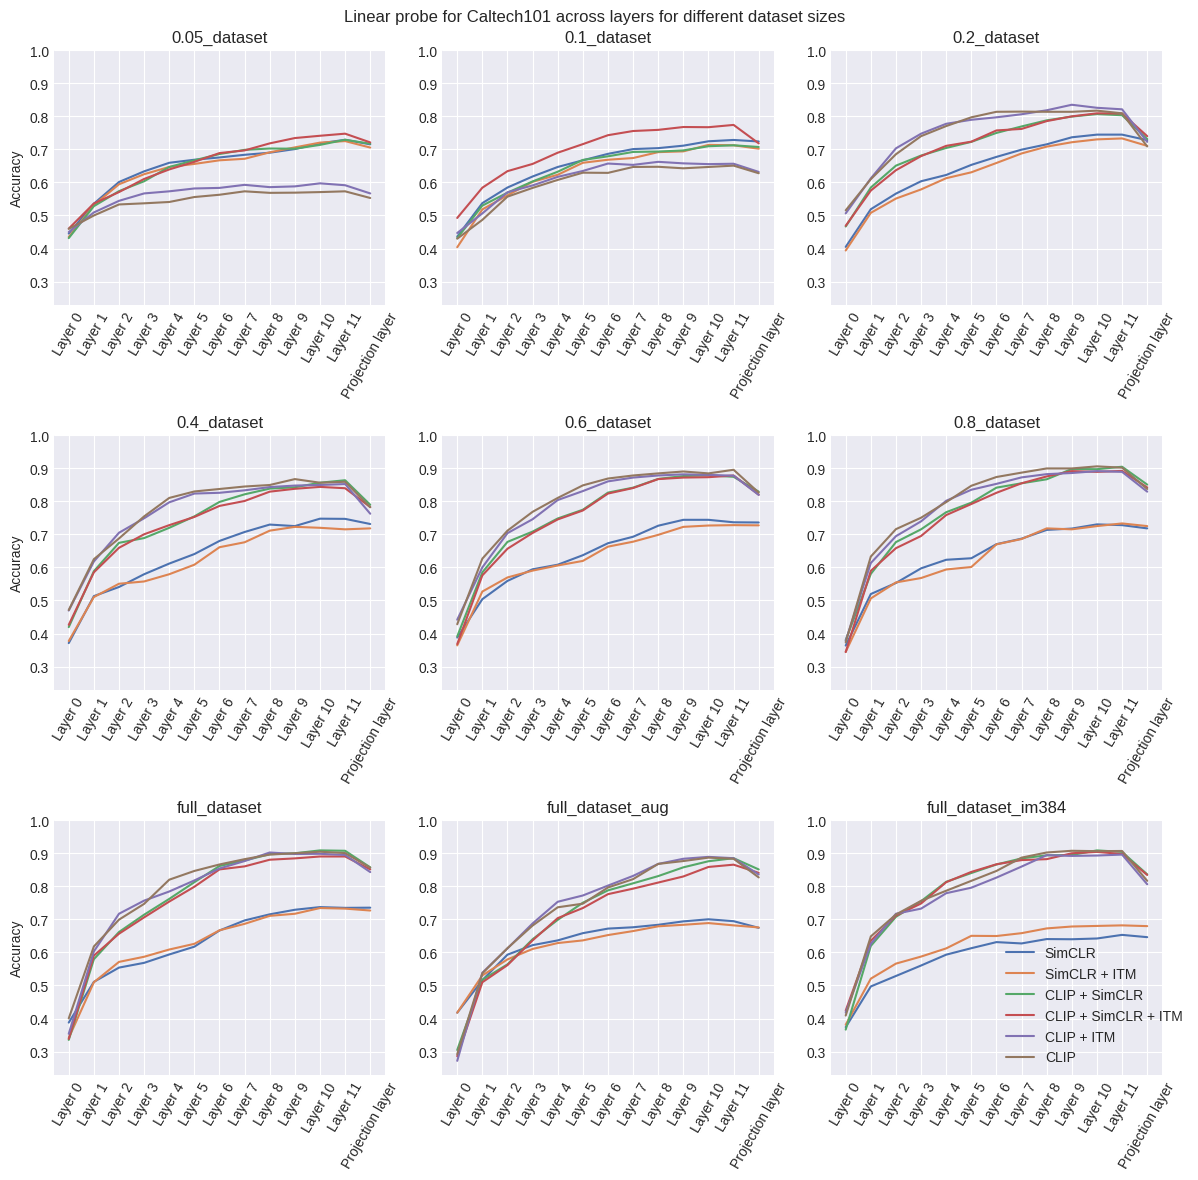

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
# fig.delaxes(axs.flat[7])

dataset_name = "Caltech101"
fig.suptitle(f"Linear probe for {dataset_name} across layers for different dataset sizes")
ylabel = "Accuracy"
axs[0, 0].set_ylabel(ylabel)
axs[1, 0].set_ylabel(ylabel)
axs[2, 0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)

baseline = 1/10
width = 0.2
models_row = list(y_values.keys())
# datasets = [dataset.replace("zeroshot_", "") for dataset in list(data_zeroshot["full_dataset"]["zathvtrx"].keys())]
layers = [f"Layer {i}" for i in range(12)] + ["Projection layer"]

for sind, size in enumerate(y_values.keys()):
    axs.flat[sind].set_title(size)
    axs.flat[sind].set_ylim(0.23, 1.0)
    axs.flat[sind].set_xticks(range(len(layers)), layers, rotation=60)
    # axs.flat[sind].axhline(baseline,linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(y_values[size].items()):
        axs.flat[sind].plot(y, c=colors[idx], label=model)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 0.09), loc="lower right")
fig.tight_layout()

#### bar plot for full, high-res, high-aug models

In [1]:
from omegaconf import OmegaConf
from utils import load_linear_probe_across_layers_results

data_dir = "/home/phisch/multimodal/test_results"
data = load_linear_probe_across_layers_results(data_dir, "Caltech101")
model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")

/home/phisch/multimodal/test_results/0.2_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.8_dataset/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset_im384/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset_aug/linear_per_layer
/home/phisch/multimodal/test_results/0.05_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.4_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.1_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.6_dataset/linear_per_layer


In [3]:
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"
sizes = list(data.keys())

y_values = {size: {model: [] for model in model_names} for size in sizes}

for size in sizes:
    data_size_data = data[size]
    for model_id, model_data in data_size_data.items():
        for layer_name, layer_data in model_data.items():
            if size == "0.05_dataset" or size == "0.1_dataset" or size == "full_dataset_aug":
                y_values[size][model_id_mapping[model_id]["name"]].append(layer_data['classifier_0_00010'][accuracy])
            else:
                y_values[size][model_id_mapping[model_id]["name"]].append(layer_data[accuracy])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Linear probe accuracy on image classification datasets"

model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
width = 0.2

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
# fig.delaxes(axs.flat[13])
# fig.delaxes(axs.flat[14])
ylabel = "Top-1 Accuracy"
axs[0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(model_names))

# for sind, dataset in enumerate(scores.keys()):
for sind, dataset in enumerate(baselines.keys()):
    regular_models = [regular_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    high_res_models = [high_res_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    high_aug_models = [high_aug_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    # min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].bar(xsplot, regular_models, width=width, color=colors[0], label='Regular')
    axs.flat[sind].bar(xsplot+width, high_res_models, width=width, color=colors[1], label='Higher res')
    axs.flat[sind].bar(xsplot+width*2, high_aug_models, width=width, color=colors[2], label='Higher aug')
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, model_names, rotation=90)
    # axs.flat[sind].set_ylim(min_y - 0.05, 1.02)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.25), loc='center')
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

#### Linear probe across layers: plot for each layer

In [5]:
from omegaconf import OmegaConf
from utils import load_linear_probe_across_layers_results
data_dir = "/home/phisch/multimodal/test_results"
data = load_linear_probe_across_layers_results(data_dir, "Caltech101")
model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")

/home/phisch/multimodal/test_results/0.2_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.8_dataset/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset_im384/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset/linear_per_layer
/home/phisch/multimodal/test_results/full_dataset_aug/linear_per_layer
/home/phisch/multimodal/test_results/0.05_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.4_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.1_dataset/linear_per_layer
/home/phisch/multimodal/test_results/0.6_dataset/linear_per_layer


In [9]:
data

{'0.05_dataset': {'668yutoa': {'encoder_layer_0': {'classifier_0_00010': {'Top1Accuracy': 0.43490782380104065,
     'Top3Accuracy': 0.5789170265197754,
     'Top5Accuracy': 0.6486175060272217}},
   'encoder_layer_1': {'classifier_0_00010': {'Top1Accuracy': 0.531682014465332,
     'Top3Accuracy': 0.6768433451652527,
     'Top5Accuracy': 0.7419354915618896}},
   'encoder_layer_2': {'classifier_0_00010': {'Top1Accuracy': 0.5944700241088867,
     'Top3Accuracy': 0.7384792566299438,
     'Top5Accuracy': 0.7851382493972778}},
   'encoder_layer_3': {'classifier_0_00010': {'Top1Accuracy': 0.625,
     'Top3Accuracy': 0.7528801560401917,
     'Top5Accuracy': 0.8087557554244995}},
   'encoder_layer_4': {'classifier_0_00010': {'Top1Accuracy': 0.6468893885612488,
     'Top3Accuracy': 0.7782257795333862,
     'Top5Accuracy': 0.8243087530136108}},
   'encoder_layer_5': {'classifier_0_00010': {'Top1Accuracy': 0.6561059951782227,
     'Top3Accuracy': 0.7851382493972778,
     'Top5Accuracy': 0.838133633

In [7]:
model_names = ["SimCLR", "SimCLR + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"

# y_values = {size: {model: [] for model in model_names} for size in data.keys()}
y_values = {f"encoder_layer_{i}": {model: [] for model in model_names} for i in range(12)}
y_values["projection_layer"] = {model: [] for model in model_names}

sizes = ['0.05_dataset', '0.1_dataset', '0.2_dataset', '0.4_dataset', '0.6_dataset', '0.8_dataset', 'full_dataset', "full_dataset_aug", "full_dataset_im384"]
for size in sizes:
    for model_id, model_data in data[size].items():
        for layer_name, layer_data in model_data.items():
            if size in ['0.05_dataset', '0.1_dataset', "full_dataset_aug"]:
                y_values[layer_name][model_id_mapping[model_id]["name"]].append(layer_data['classifier_0_00010'][accuracy])
            else:
                try:
                    y_values[layer_name][model_id_mapping[model_id]["name"]].append(layer_data[accuracy])
                except: print(layer_data)
            # break
        # break
    # break
y_values

{'encoder_layer_0': {'SimCLR': [0.44527649879455566,
   0.4360599219799042,
   0.4049539268016815,
   0.3709677457809448,
   0.3876728117465973,
   0.36347925662994385,
   0.3876728117465973,
   0.4176267385482788,
   0.37384793162345886],
  'SimCLR + ITM': [0.43490782380104065,
   0.403801828622818,
   0.39400920271873474,
   0.3773041367530823,
   0.3640553057193756,
   0.3444700539112091,
   0.3410138189792633,
   0.4176267385482788,
   0.38133639097213745],
  'CLIP + SimCLR': [0.43145161867141724,
   0.43145161867141724,
   0.46658986806869507,
   0.4193548262119293,
   0.3911290466785431,
   0.3801843225955963,
   0.33525344729423523,
   0.30472350120544434,
   0.3663594424724579],
  'CLIP + SimCLR + ITM': [0.46025344729423523,
   0.492511510848999,
   0.46889400482177734,
   0.42626726627349854,
   0.3680875599384308,
   0.34389400482177734,
   0.33813363313674927,
   0.2857142984867096,
   0.42396312952041626],
  'CLIP + ITM': [0.4498848021030426,
   0.44700461626052856,
   0.50

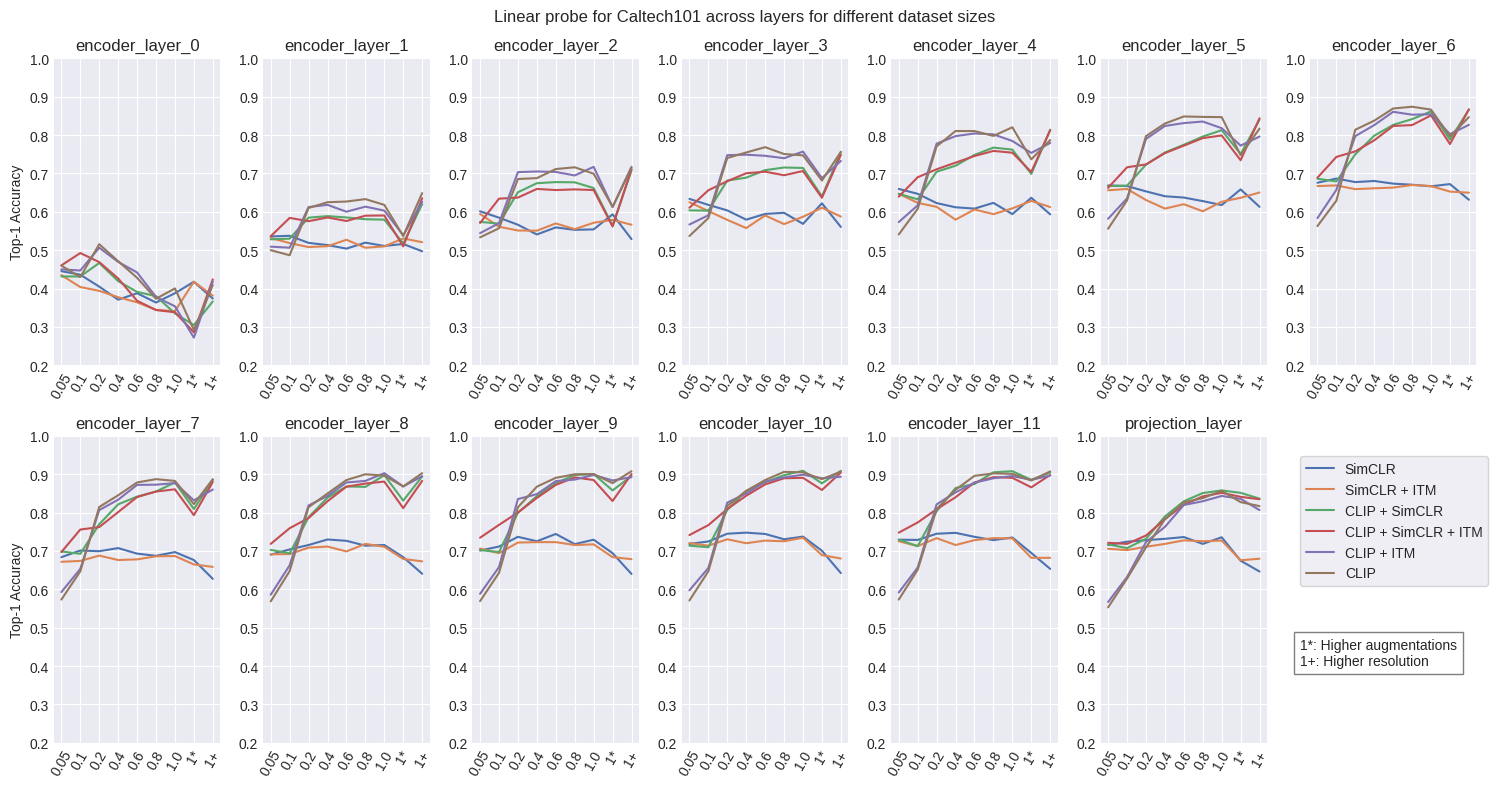

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
fig, axs = plt.subplots(2, 7, figsize=(15, 8))
dataset_name = "Caltech101"
fig.suptitle(f"Linear probe for {dataset_name} across layers for different dataset sizes")
ylabel = "Top-1 Accuracy"
axs[0, 0].set_ylabel(ylabel)
axs[1, 0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 6)

baseline = 1/10
width = 0.2
models_row = list(y_values.keys())
# datasets = [dataset.replace("zeroshot_", "") for dataset in list(data_zeroshot["full_dataset"]["zathvtrx"].keys())]
# layers = [f"Layer {i}" for i in range(12)] + ["Projection layer"]
x_ticks = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1*", "1+"]

for ind, size in enumerate(y_values.keys()):
    axs.flat[ind].set_title(size)
    axs.flat[ind].set_ylim(0.2, 1.0)
    axs.flat[ind].set_xticks(range(len(x_ticks)), x_ticks, rotation=60)
    # axs.flat[sind].axhline(baseline,linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(y_values[size].items()):
        axs.flat[ind].plot(y, c=colors[idx], label=model)#, marker=".")

for ax in axs.flat[-1:]:
    ax.set_visible(False)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0.25), frameon=True)
# Adding a second legend with custom labels
custom_labels = ["Higher augmentations", "Higher resolution"]
custom_lines = ["1*", "1+"]
fig.text(0.87, 0.16, "1*: Higher augmentations\n1+: Higher resolution", bbox=dict(facecolor='white', alpha=0.5))
#axs.flat[14].legend(frameon=True)
# plt.legend()#bbox_to_anchor=(1,1))
fig.tight_layout()